<font size="6"> Part V Lesson 2</font>

# Preamble

## Prerequisites

- Functions
- For Loops
- Section 1 and 2 of the lecture notes

## Outcomes

- Be able to integrate (simulate) ODEs with one variable 
- Understand the concept of steady states


## Estimated duration

5 hours

# Simple gene expression

In section 2 of the notes we used the input-output principle, combined with the law of mass-action, to derive the following simple differential equation for the expression of a protein, $X$, where the protein also decays

$$ \frac{dX}{dt} = a - b X $$

where $a$ and $b$ are the rate constants for expression and decay respectively. 

The following code uses the python function `odeint` to numerically integrate the system. It takes as an argument the user defined function `dexpr`, which returns the derviative $dX/dt$ as a function of the protein concentrations and the parameters. function `odeint` also takes the initial values, the time span and the parameters to pass to the user defined function. It can also take a whole range of settings controlling the integration. 

The following integrates the differential equation, assuming $X_0 = 0$, $a=10$, $b=0.1$

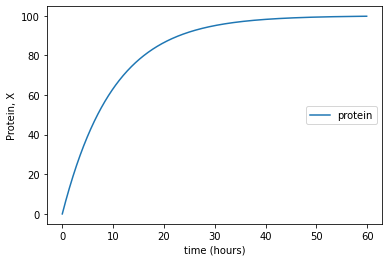

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dexpr(y, t, p):
    # X  = y[0]   protein

    # assign parameters
    a = p[0]
    b = p[1]

    dX  = a - b*y[0]

    return [dX]

# define the model parameter vector 
# note: in maths parameters are often given the greek letter theta
# note: this model has two parameters, a and b, so this is a list with two elements
theta = [10, 0.1]

# define the times at which we want to calculate the integral
times = np.arange(0, 60, 0.1)

# initial conditions
# note: we only have one variable, X, so this is a list with one value in it
y0 = [0]

# perform the ode integration
yobs = odeint(dexpr, y0, times, args=(theta,))

# make a plot
plt.close()  # close any existing plots

plt.plot( times, yobs, label='protein' )
plt.legend(loc=7)

plt.xlabel('time (hours)')
plt.ylabel('Protein, X')
#plt.savefig('plot-protein.png') # plot a png
plt.show()

The analytical solution of this differential equation is

$$ X = \frac{a}{b} - \frac{exp(-b t)(a - X_0 b)}{b} $$

where $X_0$ is the initial value of protein. 

__DIY: Numerical and exact solution__
> 
> i) Copy and modify the code above. Add a function to encode the analytical solution. Plot over the solution provided by odeint. Verify they are identical for some different intial conditions ($X_0$).


__DIY: Simple gene expression parameters (1)__
> 
> i)  Modify the code above to plot trajectories corresponding to: <br> 
>  $a=10,b=0.1$ <br> $a=5,b=0.1$ <br> $a=10,b=0.2$ <br>
> Add them on the same plot and colour them differently. What do you notice in terms of behaviour at large times?

__DIYN: Simple gene expression parameters (2)__
> 
> i)  Now overplot trajectories corresponding to: <br> 
>  $a=10,b=0.1$ <br> $a=20,b=0.2$ <br> $a=30,b=0.3$ <br>
> Add them on the same plot and colour them differently. What do you now notice?

In the previous two exercises you should see that at long times the protein levels become constant and stop changing. This is known as a **steady state** and here it is due to the processes of production and decay being balances. You should also see in teh second exercise that the three trajectories end up in the same steady state but take different times to reach the steady state. This short time behaviour is known as **transient**.

__DIYN: Gene expression steady state (optional maths)__
> i) Show using algebra and the equation for $\frac{dX}{dt}$ that the steady state of the system is at $X = a/b$  <br>
> ii) Can you simplify the above analytical solution for X for the special case that the initial number of proteins is zero, ($X_0=0$). Use this to provide an alternative argument for the steady state at $X = a/b$. Hint: what happens to $e^{-x}$ as $x$ gets large? <br>

# Logistic growth

We introduced logistic growth in Lesson 1. Now we have the tools of the input-output principle and the law of mass-action we can see how the differential equation is derived. We start with growth
$$N \rightarrow 2N$$
which has rate $kN$ assuming the law of mass-action. We can include an additional reaction to model competition between the bacteria 

$$N + N \rightarrow N$$
which essentially captures the fact that one bacteria dies due to lack of resources. Assuming mass-action, the rate for this reaction is $k' N^2$. Plugging this into the input-output principle gives us

$$ \frac{dN}{dt} = kN - k'N^2$$

We can rearrange this equation to give a more useful form
$$ \frac{dN}{dt} = kN( 1 - \frac{N}{C} )$$
where we have written $C = k/k'$. $C$ is known as the carrying capacity.

The logistic growth model therefore modifies the constant growth rate to 

$$ \frac{dN}{dt} = r N, \quad r = k(1 - \frac{N}{C}) $$

By looking at the differential equation it can be seen that if $N < C$ the growth rate is positive meaning the population is growing, whereas if $N > C$ the rate is negative and the population is declining. This more accurately accounts for density dependence or competition for fixed resources. Thus $C$ is interpreted as the maximal sustainable population number supported by these resources and is known as the *carrying capacity*. This also shows how we can get insights into dynamical systems by looking at the properties of the equations rather than directly integrating them.


__DIY: Numerically integrating the logistic growth model__
> 
> Write a function to encode the derivative in the logistic growth model. Simulate the model and plot the trajectory assuming N0=100, k=0.03, C=1000.

__DIY: Logistic growth and steady state (optional maths)__
> 
> i) Verify using algebra that the steady state of the model is at $N = C$ <br>
> ii) What does this imply about the long term behaviour of the population?

# Bacterial growth revisted

Consider the model of bacterial growth from Lesson 1 
$$N \rightarrow 2N$$

Under mass-action type assumptions this reaction gives rise to a differential equation 
$$\frac{dN}{dt} = k N$$

which has a solution
$$N = N_0 exp( kt )$$
where $N_0$ is the intial number of bacteria (at time $t=0$).


__DIY: Some maths (optional)__
> 
> i) Can you derive algebraically the relation between doubling time and $k$ introduced in Lesson 1:

$$ \text{doubling time} = \frac{ln(2)}{k} $$
> Hint: the doubling time is the time for the population to reach $2N_0$ <br>

Similarly the model of bacterial death, $N \rightarrow 0$, gives rise to the differential equation 
$$\frac{dN}{dt} = - k N$$
which has a solution
$$N = N_0 exp( -kt )$$

__DIY: Some maths (optional)__
> i) Can you derive algebraically the relation between decay rate and half-life $$ k = \frac{ln(2)}{t_{1/2}} $$